# Write Functions for EDA

### Generating Wordclouds:

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, figname='wordcloud', colormap='Pastel2', stop_words=[], save=False):
    '''
    Takes a string and plots the x most common words. 
    Set color by changing rgb parameter
    Font path may vary, if error use font_path=None
    
    '''
    font_path = "/Library/Fonts/DIN Condensed Bold.ttf"
    wc = WordCloud(background_color="white",max_words=25,
                   collocations=False, font_path=font_path, scale=5,stopwords=stop_words, colormap=colormap)#, color_func=lambda *args, **kwargs: rgb)
    wc.generate(text)
    
    fig, ax = plt.subplots(figsize=(14,18))
    plt.imshow(wc)
    plt.axis('off')
    plt.tight_layout()
    if save == True:
        plt.savefig('data/wordclouds/{}'.format(figname), dpi=240)


# Text Preprocessing 

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [177]:
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

custom_stop_words =  {'rt','new','demsinphilly','one', 'amp', 'say', 'day', 'us', 'say', 'go', 'com', 'state', 'tweet', 'politics',
 'democrats',
 'political',
 'philly',
 'dnc2016',
 'dncleak'
 'dncinphl',
 'convention',
 'democratic',
 'dnc',
 'demconvention',
 'things',
 'talk',
 'like',
 'national',
 'pennsylvania',
 'speech',
 'live',"n't","'re","'s","doesn't", 'in', 'down', 'you', 's', "weren't", 'before', 'mustn', 'shan', "isn't", 'mightn', 'than', 'aren', 'that', 'from', "that'll", 'wasn', "should've", 'weren', 'do', 'once', 'those', "aren't", 'no', 'hasn', 'himself', 'own', 'shouldn', 'does', 'all', 'your', 'isn', 'm', 'has', 'been', 'these', "hadn't", 'because', 'with', 'having', 'didn', 'up', 'myself', 'between', 'for', 'is', 'at', 'where', 'and', 'be', 'won', 'll', 'or', "mightn't", 'above', 'too', "you'll", "won't", 'he', 'have', 'into', 'of', 'after', 'ma', 'just', "didn't", 'am', 'but', 'couldn', 'the', 'nor', 'being', 'same', 'will', 'theirs', 'while', 'again', 't', 'can', "shan't", 'off', 'any', 'd', 'by', 'our', 'some', 'so', 'themselves', 'what', 'an', 'i', 'only', 'as', 'are', "you're", 'they', 'both', 'them', 'very', 'other', 'a', 'few', "you've", "wasn't", 'yourselves', 'over', "don't", 've', 'against', 'below', 'was', 'my', 'out', 'doing', "needn't", 'did', 'about', "hasn't", 'whom', 'how', 'why', 'further', 'o', 'on', 'not', 'ain', "you'd", 'here', 'y', 'if', "haven't", 'she', 'during', 'we', 'ours', 'through', 'then', 'her', "she's", 'their', 'which', 'don', 'hadn', 'its', 'yours', 'had', 'me', 'his', 'hers', 'when', 're', 'most', 'itself', "it's", 'under', 'now', 'to', 'him', "mustn't", 'yourself', 'should', 'until', 'it', "couldn't", 'who', 'each', "shouldn't", 'there', 'ourselves', 'haven', 'wouldn', 'herself', "wouldn't", 'needn', 'were', 'more', 'this', 'doesn', 'such'}


p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER, p.OPT.HASHTAG)

#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):
    tweet=p.clean(tweet).lower()
    #stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
#after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in custom_stop_words]
    filtered_tweet = []
#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in custom_stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)return tweet

In [ ]:
df = pd.read_csv('large_data/million-dconvention-tweets.csv')
df.describe()
df.columns

In [ ]:
#clean text column
df['text'] = df['text'].apply(lambda x: clean_tweets(x))

In [ ]:
#clean description column
df['user_description'].fillna(value='', inplace=True)
df['user_description'] = df['user_description'].apply(lambda x: clean_tweets(x))

In [ ]:
#clean user location column
df['user_location'].fillna(value='', inplace=True)
df['user_location'] = df['user_location'].apply(lambda x: clean_tweets(x))

In [ ]:
#save the cleaned text df
df.to_csv('/Users/jacobmullins/data-science-immersive/capstone_2-3/large_data/million_df.csv')

# Create User Summary DataFrame for Clustering Users
Group by users and combine their text and hashtag features (respectively)

In [71]:
df = pd.read_csv('large_data/million_df.csv', index_col=0)
df['user_description'].fillna('', inplace=True)

In [72]:
#are any screen names missing? if not, use these as the global key/index
df['user_screen_name'].isna().nunique()
#all screen names are present. some are floats though? (from error below)
#ensure that all usernames are strings
df['user_screen_name'] = df['user_screen_name'].astype('str')
df['user_screen_name'].dtypes

1

dtype('O')

In [73]:
features = ['user_location',
       'favorite_count', 
        'retweet_count', 
       'text', 
       'user_screen_name', 'user_description',
       'user_followers_count', 
       'user_name']


final_df = df[features]
final_df = final_df[final_df['text'].isna()==False]
final_df['user_location'].fillna(value='', inplace=True)
final_df['user_location']

0           adelaide south australia
1           winnipeg manitoba canada
2                      united states
3                      united states
4                      united states
                     ...            
605839                 united states
605840                panama city fl
605841            south carolina usa
605842    anywhere usa ghana england
605843                 united states
Name: user_location, Length: 590893, dtype: object

In [74]:
#group by username and select only the text columns

combined_text = final_df.groupby(['user_screen_name']).apply(lambda x: ' '.join(x['text']))
combined_text.rename('combined_text',inplace=True)
final_df = final_df.merge(combined_text, left_on='user_screen_name',right_index=True)

user_summary = final_df.groupby(['user_screen_name', 'user_description', 'combined_text', 'user_location']).mean() 
# ^excluded the user location because when I included it, only got 186,000 of the 250,000 users. maybe add back later
user_summary.reset_index(inplace=True)

user_screen_name
000120o         rt meryl streep celebrated breaking glass ceil...
0001Angel       rt sanders `` hillary clinton must become next...
000Dillon000    rt muslim talking trump disrespecting women re...
0014Priya             latest screenwriting tvseries movies thanks
001Leslie                                  wow .. moving touching
                                      ...                        
zzzdeprived     amazing job ca wait see win rt `` america grea...
zzzdogman       rt bernie taught anything loves money especial...
zzzpills        rt subway filled sandernistas never miss oppor...
zzzzalex                                          rt mostly false
zzzzzabeth      rt much stronger together rt pass torch iconic...
Name: combined_text, Length: 248744, dtype: object

In [75]:
user_summary

,user_screen_name,user_description,combined_text,user_location,favorite_count,retweet_count,user_followers_count
0,000120o,,rt meryl streep celebrated breaking glass ceil...,italia-roma,0.0,19.000000,3447.0
1,0001Angel,liberal,rt sanders `` hillary clinton must become next...,,0.0,166.000000,639.0
2,000Dillon000,independent christian conservative army vet ar...,rt muslim talking trump disrespecting women re...,,0.0,179.500000,4181.0
3,0014Priya,screenwriter yogini movie art book music natur...,latest screenwriting tvseries movies thanks,netherlands,0.0,0.000000,524.0
4,001Leslie,always love dad,wow .. moving touching,,0.0,0.000000,162.0
...,...,...,...,...,...,...,...
248780,zzzdeprived,,amazing job ca wait see win rt `` america grea...,ohio,0.0,55.500000,158.0
248781,zzzdogman,deplorable dreg cagey old vet- reagan trump ma...,rt bernie taught anything loves money especial...,colorado,0.0,289.500000,11748.5
248782,zzzpills,lover mother earth bernie sanders,rt subway filled sandernistas never miss oppor...,austin tx,0.0,252.923077,357.0
248783,zzzzalex,,rt mostly false,,0.0,453.000000,10.0


In [14]:
user_summary.combined_text.apply(lambda x: len(x)).mean()
# the average combined text length is 128 chars (standard length of a tweet)

113.25150230118375

In [ ]:
# how many users are missing descriptions? 38,602
user_summary[user_summary['user_description']=='']

# Vectorize Tweet Text
(using Gensim + GloVe)

In [29]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import gensim.downloader as api
import gensim
from gensim.models.word2vec import Word2Vec

In [44]:
#start with the glove-25 and increase if needed (50, 100, 200 available)
glove_25 = api.load('glove-twitter-25')

2020-06-08 15:39:39,596 : INFO : loading projection weights from /Users/jacobmullins/gensim-data/glove-twitter-25/glove-twitter-25.gz
2020-06-08 15:41:08,912 : INFO : loaded (1193514, 25) matrix from /Users/jacobmullins/gensim-data/glove-twitter-25/glove-twitter-25.gz


In [88]:
# take a look at the vocabulary
for i, word in enumerate(glove_25.vocab):
    if i == 20:
        break
    #print(word)

# try to vectorize a word
#sample_text = user_summary['combined_text'][0].split()
#sample_text
#glove_25.word_vec(sample_text[0])

# test again with sentences
sentences = user_summary['combined_text']
#print(sentences)


#write a function to loop through tweets and vectorize each word
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

X = []
for sentence in sentences:
    X.append(sent_vectorizer(sentence, glove_25))

In [91]:
#verify that the number of vectors equals the number of tweets
len(X)
user_summary.shape

248785

(248785, 7)

# Cluster Users

In [98]:
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
from sklearn import cluster
from sklearn import metrics

model = glove_25
sentences = user_summary['combined_text']
NUM_CLUSTERS=10

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[9 5 9 ... 9 1 9]
Centroids data
[[ 0.78363093  0.1202749  -0.09576832 -0.16861644 -0.01095276  0.03507455
  -0.23821217  1.96866412  0.06084616 -0.15197079 -0.55814072 -1.3620993
  -3.70638638 -0.07156021 -0.87716392 -0.52566289 -1.15550503 -0.00544099
  -0.92769579  0.31770413 -0.28761601 -0.27947861  0.40541655  0.35576835
   0.36598264]
 [ 0.5628938   0.20743167 -0.31180108 -0.14490282 -0.10727117  0.21689967
  -0.15656922  1.97820328 -0.13427067 -0.18628472 -0.43851269 -1.1149554
  -3.98937084  0.09448095 -0.62338662 -0.28304981 -0.85580387  0.01680854
  -0.86936504  0.47930388 -0.1662217  -0.50078997  0.4654984   0.25097936
   0.2302312 ]
 [ 0.64090516  0.17567717 -0.20781906 -0.21213329 -0.07790606  0.10327445
  -0.11011874  1.90786865 -0.05614044 -0.10575339 -0.52543931 -1.13704269
  -3.90900306  0.01658052 -0.82405935 -0.39676855 -0.99030711 -0.01056842
  -0.93180892  0.37500567 -0.22558473 -0.38740312  0.43369594  0.28255078
   0.28632754]


In [104]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [133]:
#join cluster labels on the user_summary dataframe


In [21]:
#compare clusters to communities

# Create User Summaries for Labeled Community Data + TF-IDF Model

#### 1.) Load df with processed text and descriptions

In [116]:
df = pd.read_csv('large_data/million_df.csv', index_col=0)
#fill NaN text fields with blank text
df['text'].fillna('', inplace=True)
df['user_description'].fillna('', inplace=True)
#df['hashtags'].fillna('', inplace=True)
df['user_location'].fillna('', inplace=True)
#make sure all rows are str type
df['text'] = df['text'].astype('str')
df['user_description'] = df['user_description'].astype('str')
#df['hashtags'] = df['hashtags'].astype('str')
df['user_location'] = df['user_location'].astype('str')
df['user_screen_name'] = df['user_screen_name'].astype('str')
# nodes = 
# edges = 
# tweets = 605,000
# total users =
df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'reweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

#### 2.) Load labeled community df

In [117]:
#open labeled community nodes
community_df = pd.read_csv('large_data/million_nodes.csv', index_col='Id')
#take only the basic features for now
community_df[['Label','modularity_class']]

/Users/jacobmullins/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Label,modularity_class
Id,,
7874982,lauraleishman,0
18464266,peterdaou,13
25493304,zachhaller,2
539666970,NewsNeck,8
106182754,Richard_Schiff,13
...,...,...
241010173,NaN,2
159538373,NaN,13
236966874,NaN,68


#### 3.) Merge community labels onto tweet df

In [118]:
labeled_df = df.merge(community_df, left_on='user_screen_name', right_on='Label', how='outer')
# how many labeled tweets do we have? ~495,000
labeled_df['modularity_class'].dropna()

1             1.0
3            13.0
4            13.0
5            13.0
6            13.0
           ...   
930911      613.0
930912    11203.0
930913       13.0
930914       12.0
930915       30.0
Name: modularity_class, Length: 495026, dtype: float64

In [119]:
#filter out all those rows that don't have an assigned modularity class. Keep unlabeled ones for later use.
unlabeled_df = labeled_df[labeled_df['modularity_class'].isna() == True]
labeled_df = labeled_df[labeled_df['modularity_class'].isna() == False]

In [120]:
#drop the unneeded columns
features = [
        'id', 'user_location',
       'favorite_count', 
        'retweet_count', 
       'text', 
       'user_screen_name', 'user_description',
       'user_followers_count', 
       'user_name', 
       'modularity_class']
labeled_df = labeled_df[features]
#rename community column
labeled_df.rename(columns={'modularity_class':'community'},inplace=True)

In [121]:
#drop the users with no username
labeled_df = labeled_df[labeled_df['user_screen_name'].isna() == False]
labeled_df['user_screen_name'] = labeled_df['user_screen_name'].astype('str')

In [122]:
# group by username and combine their tweet text, hashtags
combined_text = labeled_df.groupby('user_screen_name').apply(lambda x: ' '.join(x['text']))
combined_text.rename('combined_text', inplace=True)

labeled_df = labeled_df.merge(combined_text, left_on='user_screen_name', right_index=True)

user_summary = labeled_df.groupby(['user_screen_name', 'user_location','user_description', 'combined_text', 'community']).mean()
user_summary.drop(columns=['id'], inplace=True)
user_summary.reset_index(inplace=True)

user_screen_name
000bangbang000                                                      
00LovelyDay00      rt unity probably stop saying name  chanting `...
01507db5dba34b2                                            rt rt htt
01_zebra                                     next scum complete scum
0463diamond        rt `` theme tonight 'compassion criminals '' r...
                                         ...                        
zunigasalvador     walk water heal sick went roman b really horny...
zuriberry          jordan davis mother stop mother child dies mot...
zzelda01           rt rt https media plays bernie drama pro-hilla...
zzyzxbaker         rt sheeple march near extreme heat chant extre...
zzzanthropology    need step needs step prison jumpsuit needs sto...
Name: combined_text, Length: 31241, dtype: object

#### 4.) Break top 17 communities into separate df and explore data

In [151]:
# select the users that belong to one of the largest 17 communities. Smallest community = 1% of all users. 
top_communities = [30.0, 13.0, 2.0, 6.0, 8.0, 61.0, 58.0, 68.0, 127.0, 12.0, 70.0, 1029.0, 62.0, 50.0, 273.0, 4382.0, 32.0]

#user_summary = user_summary[user_summary['community'] in top_communities]
user_summary = user_summary[user_summary['community'].apply(lambda x: x in top_communities)]
user_summary

#for label in top_communities:
#    users = user_summary[user_summary['community'] == label].copy()
#    print('Community Label = {}'.format(label))
#    plot_wordcloud((' '.join(users['combined_text'])), save=False, stop_words=['demconvention', 'democratic', 'debate', 'dncinphl', 'convention', 'tonight', 'vote'])

for label in top_communities:
    print('{}:'.format(label), user_summary[user_summary['community'] == float(label)].shape[0])

#for label in top_communities:
#    users = user_summary[user_summary['community'] == label].copy()
#    plot_wordcloud((' '.join(users['user_description'])), save=False, stop_words=['demconvention', 'democratic', 'debate', 'dncinphl', 'convention', 'tonight', 'vote'])


,user_screen_name,user_location,user_description,combined_text,community,favorite_count,retweet_count,user_followers_count
0,000bangbang000,,ecclesiastes :8 ++there time war time peace++ ...,,2.0,2.000000,2.000000,4.0
1,00LovelyDay00,face usa,speak sarcasm truth people dont criminals 'm p...,rt unity probably stop saying name chanting `...,30.0,0.333333,180.333333,3917.0
3,01_zebra,usa,banner maga zebra christian animal doc selah m...,next scum complete scum,30.0,0.000000,0.000000,13395.0
4,0463diamond,,,rt `` theme tonight 'compassion criminals '' r...,30.0,0.000000,269.272727,333.0
5,0516_864,hilton head island sc,life short argue constitutional birthrights,'ve saying neither sent nore received classifi...,30.0,1.000000,0.000000,2646.0
...,...,...,...,...,...,...,...,...
31251,zunigasalvador,princeton nj,producer jersey,walk water heal sick went roman b really horny...,2.0,0.000000,0.000000,331.0
31252,zuriberry,washington dc,senior managing editor send tips zberry wamu d...,jordan davis mother stop mother child dies mot...,61.0,0.625000,1.250000,5939.0
31253,zzelda01,red hell,strong educated old woman activist child anti-...,rt rt https media plays bernie drama pro-hilla...,13.0,0.333333,9.666667,8555.0
31254,zzyzxbaker,united states,constitution loving conservative natural born ...,rt sheeple march near extreme heat chant extre...,30.0,0.000000,274.800000,2478.7


30.0: 6082
13.0: 7483
2.0: 4266
6.0: 1082
8.0: 947
61.0: 982
58.0: 1104
68.0: 896
127.0: 595
12.0: 550
70.0: 332
1029.0: 50
62.0: 300
50.0: 463
273.0: 612
4382.0: 156
32.0: 399


#### 5.) Vectorize / TFIDF

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

vectorizer = TfidfVectorizer()


X = user_summary['user_description'] + user_summary['combined_text']
y = user_summary['community']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [154]:
vectorizer.get_params

<bound method BaseEstimator.get_params of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>

In [172]:
#logistic model
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train);
lr_predict = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print('Logistic Regression Model Score: {}'.format(lr_score))

#random forest
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train);
rf_predict = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('Random Forest Model Score: {}'.format(rf_score))

#stochastic gradient descent
sgd = SGDClassifier(class_weight='balanced')
sgd.fit(X_train, y_train);
sgd_predict = sgd.predict(X_test)        
sgd_score = sgd.score(X_test, y_test)
print('SGD Model Score: {}'.format(sgd_score))

#naive_bayes
nb = MultinomialNB()
nb.fit(X_train, y_train);
nb_predict = nb.predict(X_test)
nb_score = nb.score(X_test, y_test)
print('NB Model Score: {}'.format(nb_score))

/Users/jacobmullins/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression Model Score: 0.40152091254752853


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random Forest Model Score: 0.47452471482889735


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGD Model Score: 0.3898098859315589


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

NB Model Score: 0.48365019011406846


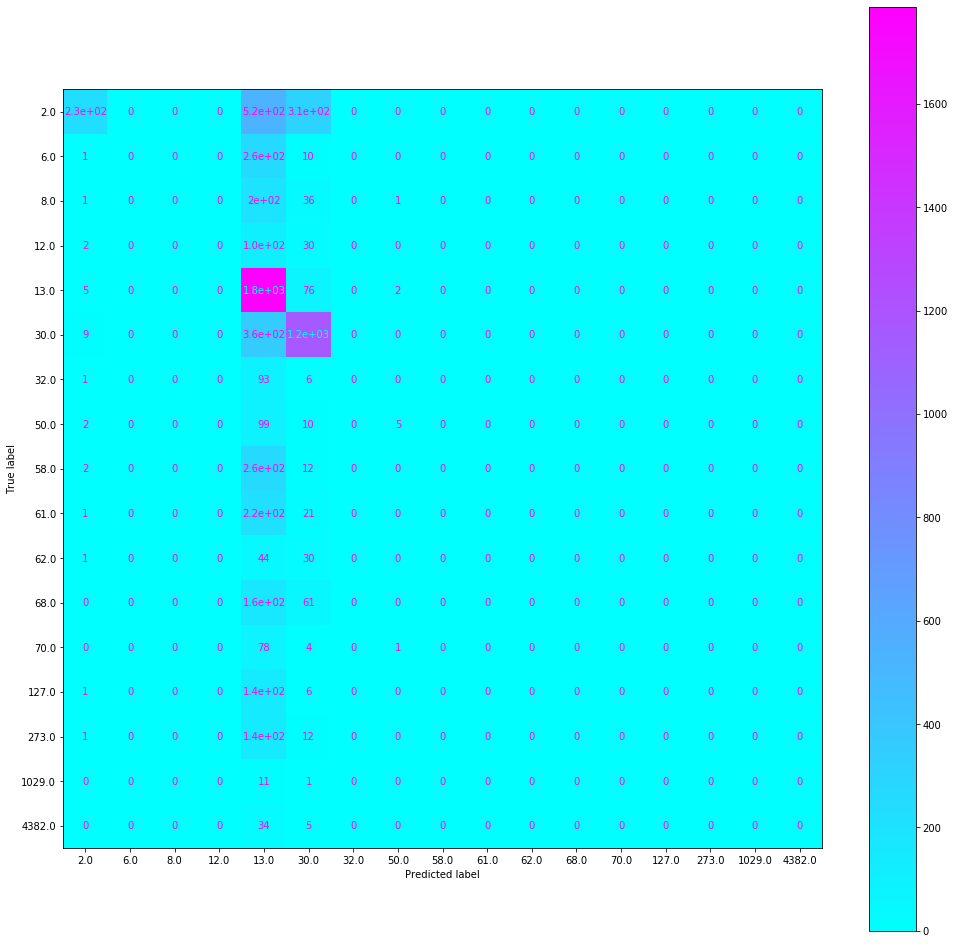

In [176]:
# plot confusion matrix
fig, ax = plt.subplots(figsize=(17,17))

cf = confusion_matrix(nb_predict, y_test)
plot_confusion_matrix(nb, X_test, y_test, cmap='cool', ax=ax)

In [163]:
# Plot top tf-idf features
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Lars Buitinck
# License: BSD 3 clause

def top_tfidf_feats(row, features, top_n=10):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=10):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

feature_names=vectorizer.get_feature_names()
top_feats_in_doc(X_train,feature_names,1)

,feature,tfidf
0,awarebusting,0.350711
1,cousins,0.326870
2,corporation,0.307622
3,desperation,0.295354
4,legitimate,0.256439
5,reid,0.234892
6,company,0.229930
7,harry,0.223831
8,america,0.219991
9,acting,0.217203


In [164]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs
dfs=top_feats_by_class(X_train,y_train,feature_names, top_n=10)

In [165]:
len(dfs)

17

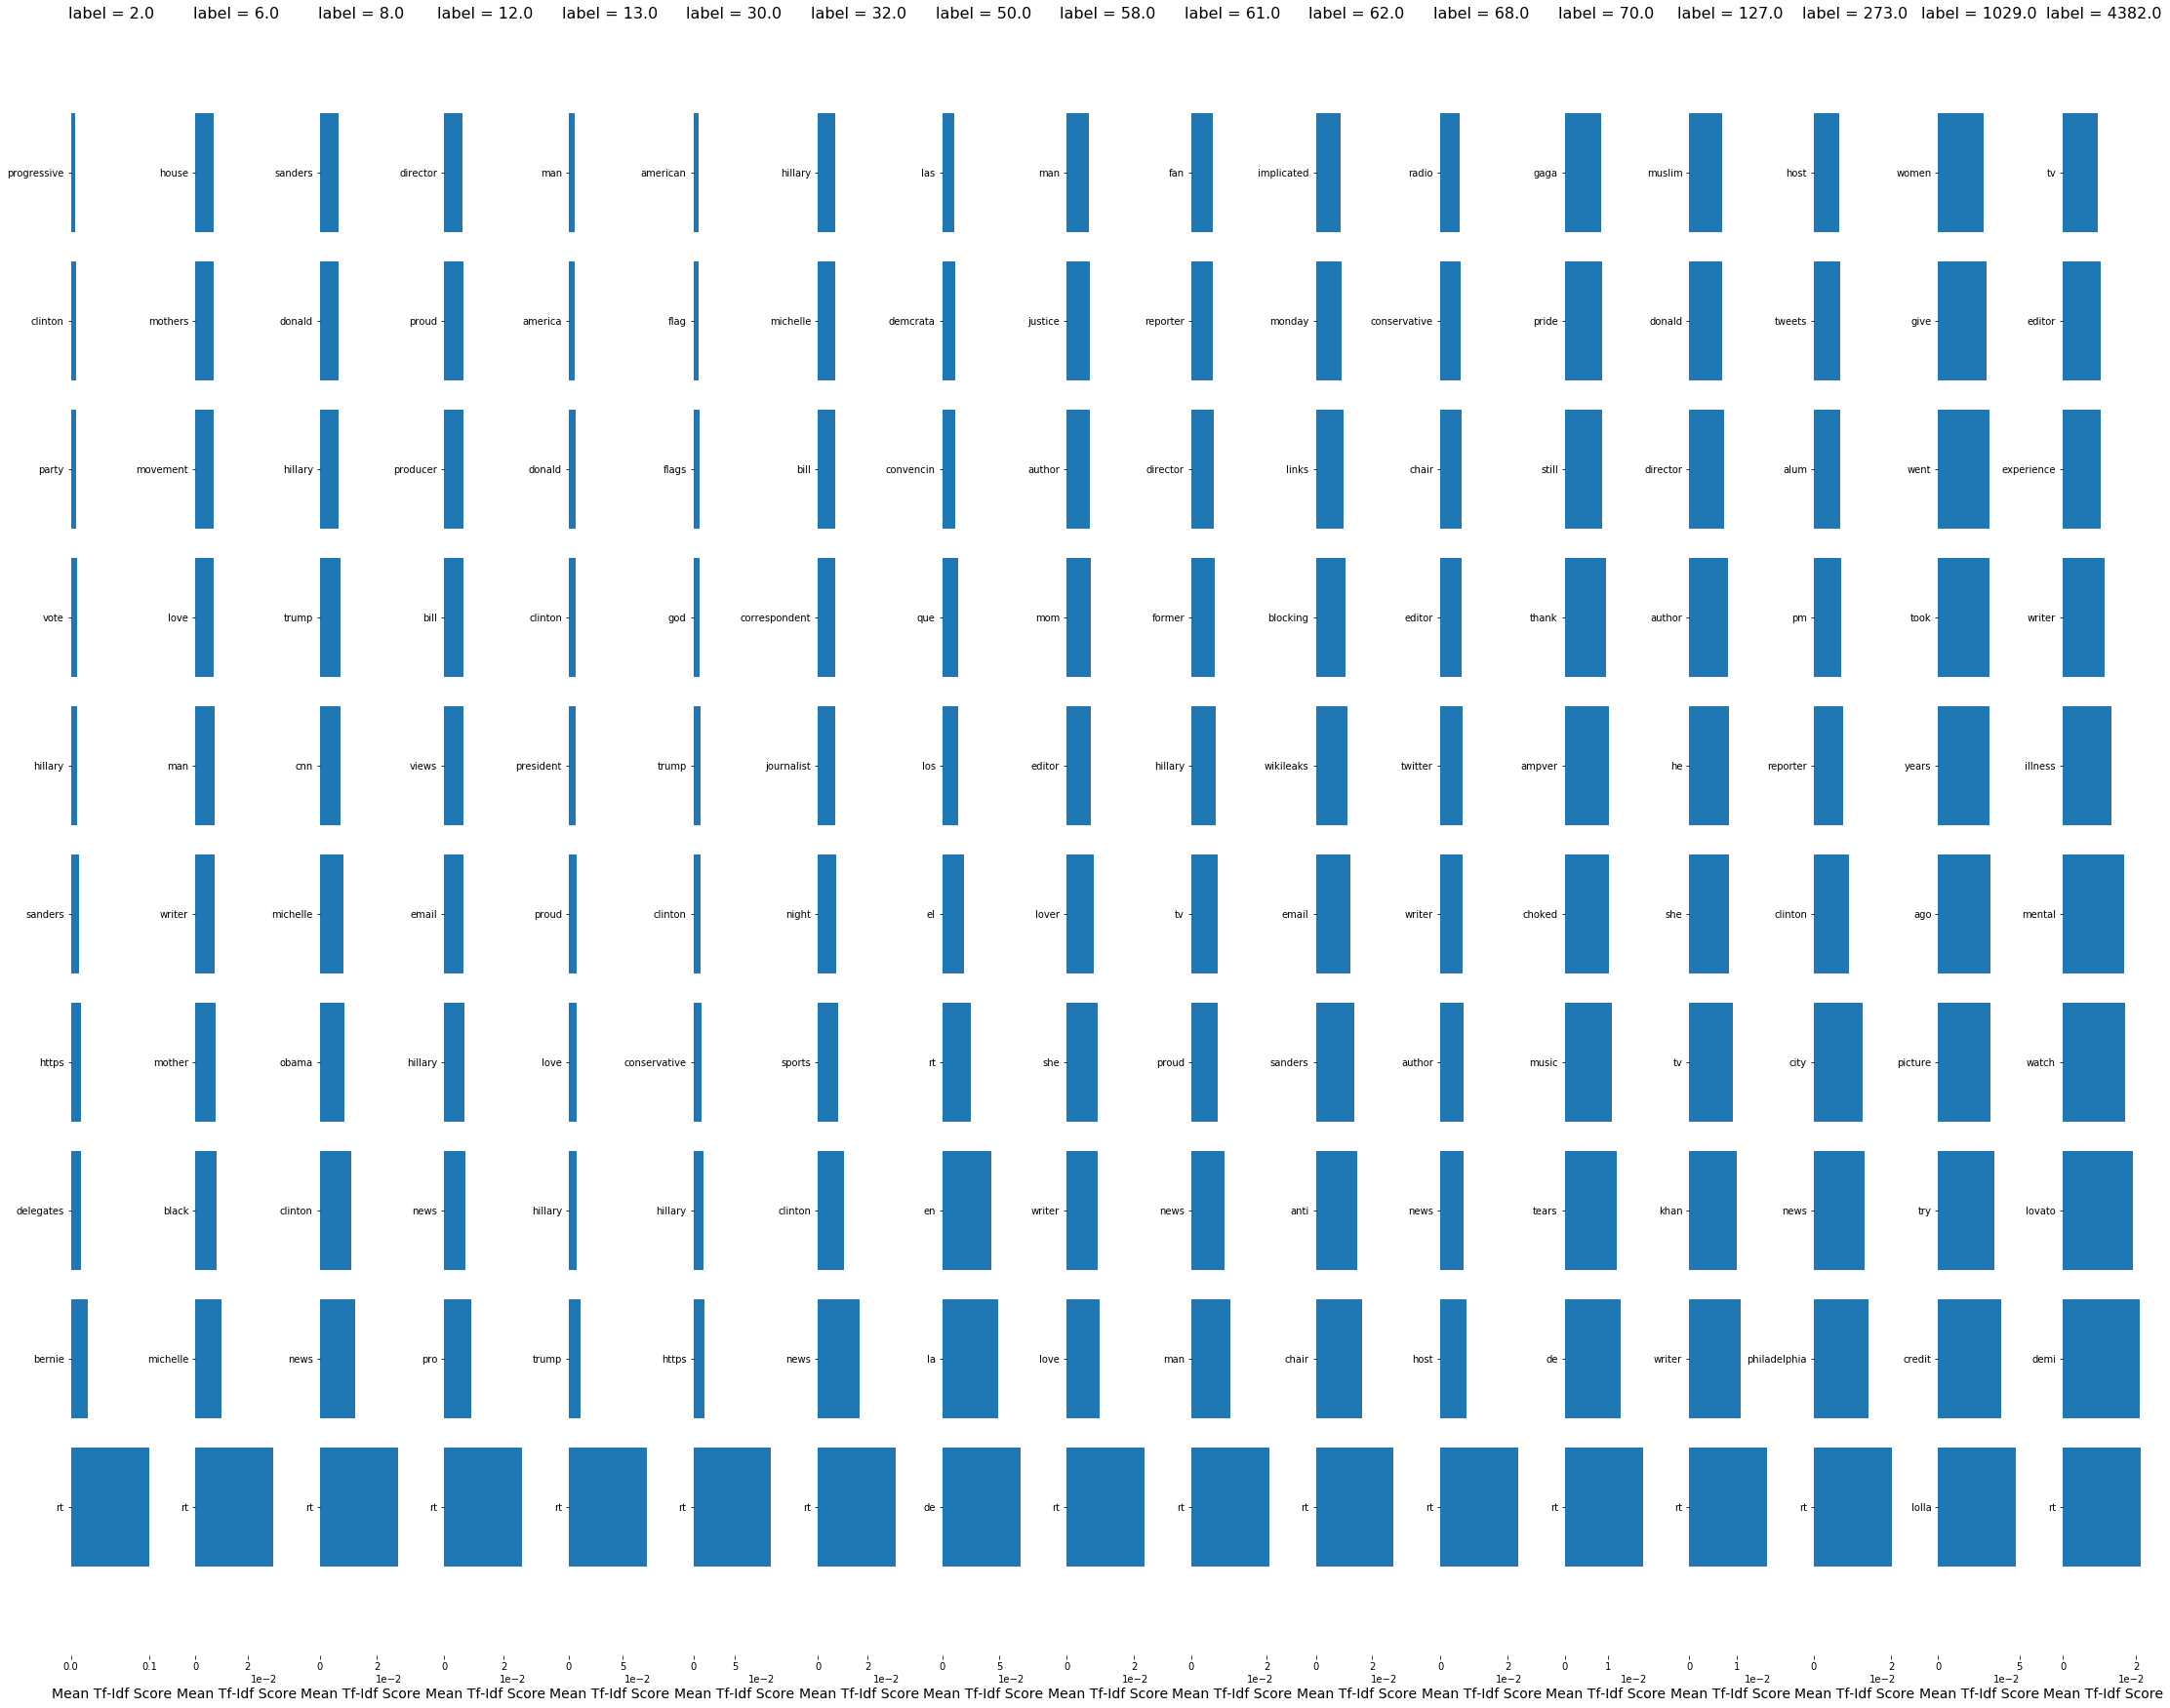

<Figure size 432x288 with 0 Axes>

In [171]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(36, 27), facecolor="w",)
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.set_cmap('viridis')    
    plt.show()
    plt.set_cmap('viridis')

plot_tfidf_classfeats_h(dfs)
plt.savefig('data/democrat/17_class_tfidf.png', dpi=240)

# Citations
GloVe - Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]

Word2Vec - Mikolov, Tomas; et al. (2013). "Efficient Estimation of Word Representations in Vector Space"

K-means code adapted from a former galvanize student's capstone https://github.com/walker777007/A-Deep-Dive-into-Reddit-Comments

TF-IDF Plots: https://github.com/GalvanizeDataScience/lectures/blob/NYC/nlp/plot_document_classification_20newsgroups_v3.ipynb